# Importing Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# Updating Column Names in a DataFrame

In [27]:
df = pd.read_csv('World_Army_Dataset.csv')
df = pd.DataFrame(df)
# Update the column names
new_columns = {
    'S no': 'Serial No',
    'country': 'Country',
    'activeDuty': 'Active Duty',
    'paramilitary': 'Paramilitary',
    'reserves': 'Reserves',
    'total': 'Total',
    'pop2022': 'Population 2022'
}

df = df.rename(columns=new_columns)

# Creating Bar Chart for Top 5 Countries' Armed Forces Personnel

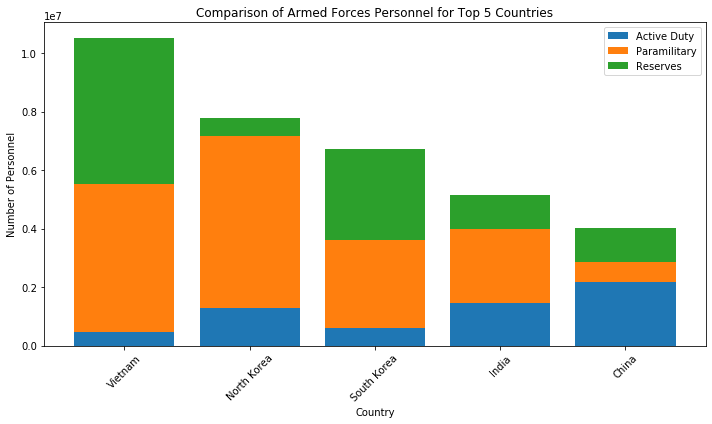

In [22]:
# Sort the DataFrame by the 'total' column in descending order and select the top 5 rows
countries = df.nlargest(5, 'Total')
# countries = df.nsmallest(5, 'Total')

# Create the bar chart for the top 5 countries
plt.figure(figsize=(10, 6))
plt.bar(countries['Country'], countries['Active Duty'], label='Active Duty')
plt.bar(countries['Country'], countries['Paramilitary'], label='Paramilitary', bottom=countries['Active Duty'])
plt.bar(countries['Country'], countries['Reserves'], label='Reserves', bottom=countries['Active Duty'] + countries['Paramilitary'])

plt.xlabel('Country')
plt.ylabel('Number of Personnel')
plt.title('Comparison of Armed Forces Personnel for Top 5 Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()



# Trend of Armed Forces Personnel Over Time

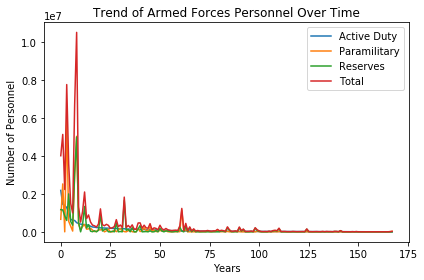

In [9]:
active_duty = df['Active Duty']
paramilitary = df['Paramilitary']
reserves = df['Reserves']
total = df['Total']

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the line chart
ax.plot( active_duty, label='Active Duty')
ax.plot( paramilitary, label='Paramilitary')
ax.plot( reserves, label='Reserves')
ax.plot( total, label='Total')

# Set the labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Number of Personnel')
ax.set_title('Trend of Armed Forces Personnel Over Time')

# Add a legend
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


# Relationship between Population and Armed Forces Size

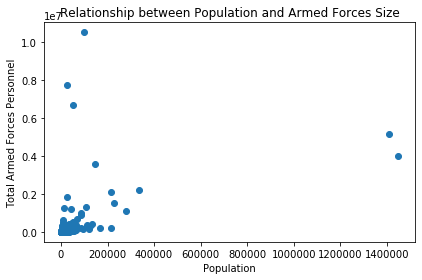

In [10]:
# Extract the required columns from the DataFrame
population = df['Population 2022']
total_personnel = df['Total']

# Create the scatter plot
plt.scatter(population, total_personnel)

# Set the labels and title
plt.xlabel('Population')
plt.ylabel('Total Armed Forces Personnel')
plt.title('Relationship between Population and Armed Forces Size')

# Display the chart
plt.tight_layout()
plt.show()


# Selecting Top and Bottom Countries Based on Total Personnel

In [12]:
# Select the top 7 and last 7 countries based on total personnel
top_countries = df.nlargest(7, 'Total')
last_countries = df.nsmallest(7, 'Total')

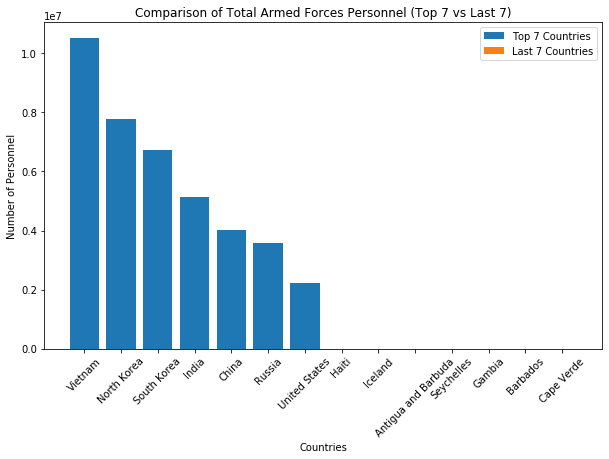

In [13]:
# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries['Total'], label='Top 7 Countries')
plt.bar(last_countries['Country'], last_countries['Total'], label='Last 7 Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Personnel')
plt.title('Comparison of Total Armed Forces Personnel (Top 7 vs Last 7)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

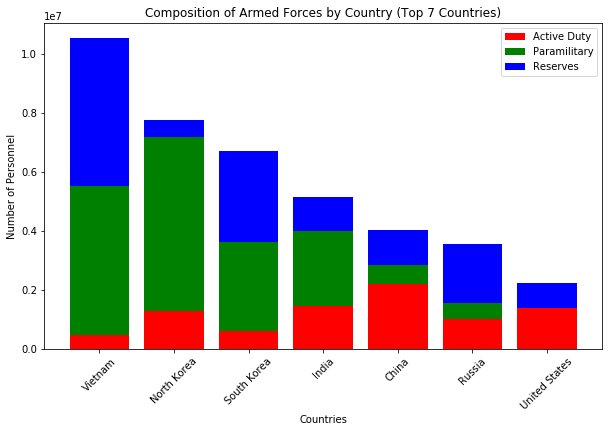

In [14]:
# Stacked Bar Chart
plt.figure(figsize=(10, 6))
index = np.arange(len(top_countries))
bar_width = 0.5
plt.bar(index, top_countries['Active Duty'], color='r', label='Active Duty')
plt.bar(index, top_countries['Paramilitary'], color='g', label='Paramilitary', bottom=top_countries['Active Duty'])
plt.bar(index, top_countries['Reserves'], color='b', label='Reserves',
        bottom=top_countries['Active Duty'] + top_countries['Paramilitary'])
plt.xlabel('Countries')
plt.ylabel('Number of Personnel')
plt.title('Composition of Armed Forces by Country (Top 7 Countries)')
plt.legend()
plt.xticks(index, top_countries['Country'], rotation=45)
plt.show()


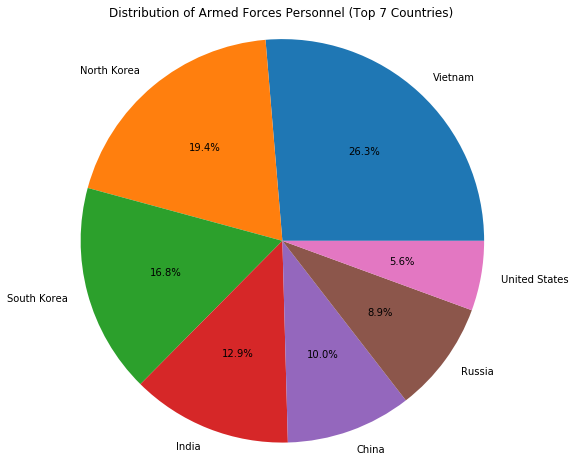

In [15]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries['Total'], labels=top_countries['Country'], autopct='%1.1f%%')
plt.title('Distribution of Armed Forces Personnel (Top 7 Countries)')
plt.axis('equal')
plt.show()


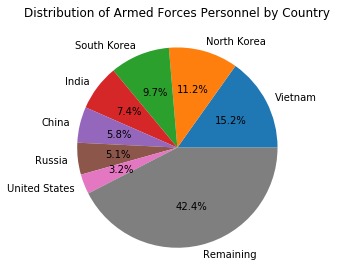

In [16]:

# Select the top 7 countries based on total personnel
top_countries = df.nlargest(7, 'Total')

# Extract the required columns from the DataFrame
countries = top_countries['Country']
total_personnel = top_countries['Total']

# Calculate the total personnel for all remaining countries
remaining_total = df['Total'].sum() - total_personnel.sum()

# Create a list of labels including the top 7 countries and 'Remaining'
labels = list(countries) + ['Remaining']

# Create a list of values including the total personnel for the top 7 countries and the remaining total
values = list(total_personnel) + [remaining_total]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Armed Forces Personnel by Country')

# Display the chart
plt.tight_layout()
plt.show()


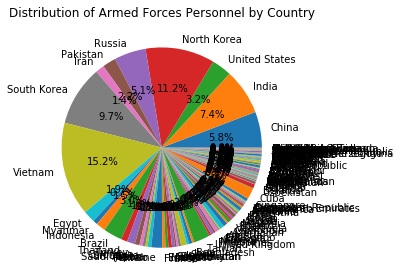

In [18]:

# Extract the required columns from the DataFrame
countries = df['Country']
total_personnel = df['Total']

# Create the pie chart
plt.pie(total_personnel, labels=countries, autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Armed Forces Personnel by Country')

# Display the chart
plt.tight_layout()
plt.show()


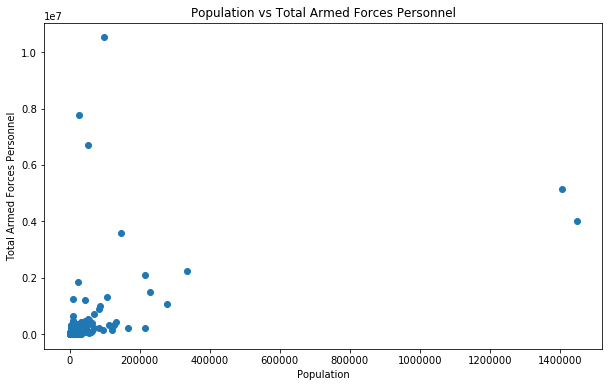

In [19]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Population 2022'], df['Total'])
plt.xlabel('Population')
plt.ylabel('Total Armed Forces Personnel')
plt.title('Population vs Total Armed Forces Personnel')
plt.show()

# Composition of Armed Forces by Country

In [ ]:
# Extract the required columns from the DataFrame
countries = df['Country']
total_personnel = df['Total']

# Create the treemap
squarify.plot(sizes=total_personnel, label=countries, alpha=0.7)

# Set the title
plt.title('Composition of Armed Forces by Country')

# Remove axis labels
plt.axis('off')

# Display the chart
plt.show()


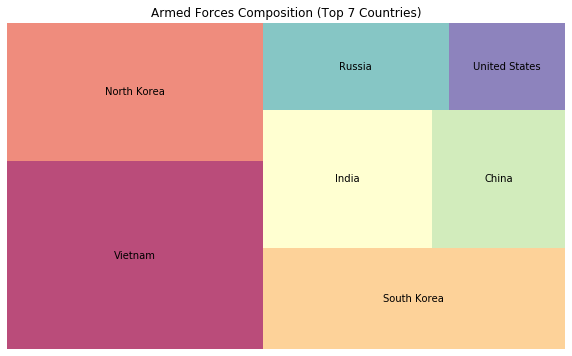

In [20]:
# Treemap
plt.figure(figsize=(10, 6))
sizes = top_countries['Total']
labels = top_countries['Country']
colors = plt.cm.Spectral(np.linspace(0, 1, len(sizes)))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.title('Armed Forces Composition (Top 7 Countries)')
plt.axis('off')
plt.show()


In [21]:
# Calculate the composite index based on active duty, paramilitary, and reserves
df['composite_index'] = df['Active Duty'] + df['Paramilitary'] + df['Reserves']

# Rank the countries based on the composite index
ranked_data = df.sort_values('composite_index', ascending=False)

# Print the ranked countries
print(ranked_data[['Country', 'composite_index']])


                 Country  composite_index
8                Vietnam         10522000
3            North Korea          7769000
7            South Korea          6712500
1                  India          5137500
0                  China          4015000
..                   ...              ...
159               Gambia              800
161           Seychelles              420
162  Antigua and Barbuda              260
164              Iceland              250
163                Haiti              200

[168 rows x 2 columns]


Here are the top and bottom ranked countries based on the composite index:

1. Vietnam - Composite Index: 10,522,000
2. North Korea - Composite Index: 7,769,000
3. South Korea - Composite Index: 6,712,500
4. India - Composite Index: 5,137,500
5. China - Composite Index: 4,015,000


163. Gambia - Composite Index: 800
164. Seychelles - Composite Index: 420
165. Antigua and Barbuda - Composite Index: 260
166. Iceland - Composite Index: 250
167. Haiti - Composite Index: 200

The composite index provides a measure of the overall strength and size of the armed forces in each country, taking into account the active duty, paramilitary, and reserves personnel.